In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import researchpy as rp
import statsmodels.api as sm


from scipy import stats
from statsmodels.formula.api import ols

In [3]:
bike = pd.read_csv('datasets/bike_sharing_data_processed.csv')
bike.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


In [4]:
bike['weathersit'].unique()

array([2, 1, 3], dtype=int64)

In [5]:
bike['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [6]:
rp.summary_cont(bike.groupby(['weathersit']))['cnt']

C:\Users\EnlargedSquash\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2128: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\EnlargedSquash\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2129: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


,N,Mean,SD,SE,95% Conf.,Interval
weathersit,,,,,,
1,463,4876.7862,1879.4840,87.3470,4705.1395,5048.4329
2,247,4035.8623,1809.1099,115.1109,3809.1337,4262.5910
3,21,1803.2857,1240.2844,270.6523,1238.7150,2367.8564


<AxesSubplot:title={'center':'cnt'}, xlabel='weathersit'>

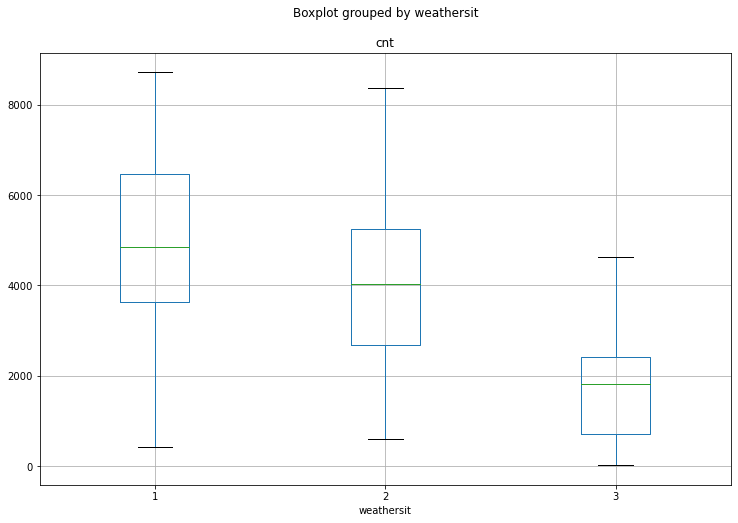

In [7]:
bike.boxplot(column=['cnt'], by='weathersit', figsize=(12, 8))

In [8]:
rp.summary_cont(bike.groupby(['season']))['cnt']

,N,Mean,SD,SE,95% Conf.,Interval
season,,,,,,
1,181,2604.1326,1399.9421,104.0569,2398.8044,2809.4608
2,184,4992.3315,1695.9772,125.0291,4745.6476,5239.0154
3,188,5644.3032,1459.8004,106.4669,5434.2727,5854.3337
4,178,4728.1629,1699.6153,127.3915,4476.7612,4979.5647


<AxesSubplot:title={'center':'cnt'}, xlabel='season'>

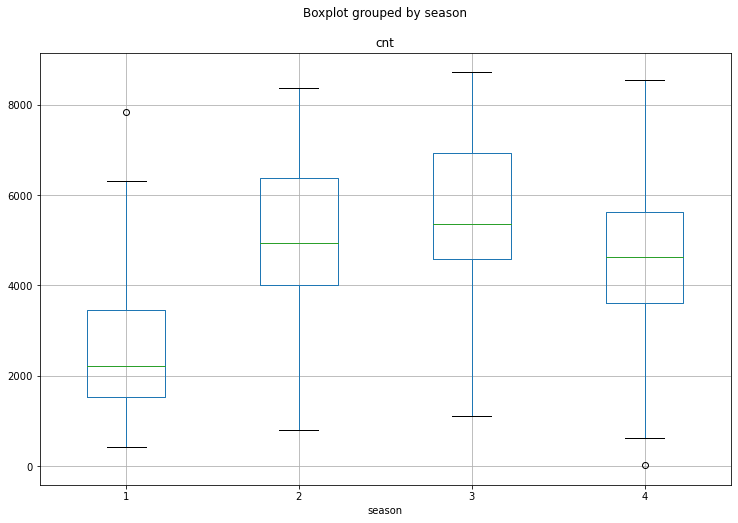

In [9]:
bike.boxplot(column=['cnt'], by='season', figsize=(12, 8))

In [11]:
model = ols('cnt ~ C(weathersit)', bike).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     40.07
Date:                Mon, 28 Feb 2022   Prob (F-statistic):           3.11e-17
Time:                        16:52:04   Log-Likelihood:                -6531.5
No. Observations:                 731   AIC:                         1.307e+04
Df Residuals:                     728   BIC:                         1.308e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           4876.7862     85

In [13]:
# We can reject the null hypothesis since the P value is 0,
# meaning the data is significant

In [14]:
model = ols('cnt ~ C(season)', bike).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     128.8
Date:                Mon, 28 Feb 2022   Prob (F-statistic):           6.72e-67
Time:                        16:55:55   Log-Likelihood:                -6413.9
No. Observations:                 731   AIC:                         1.284e+04
Df Residuals:                     727   BIC:                         1.285e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2604.1326    116.598     22.

In [15]:
model = ols('cnt ~ C(weathersit) + C(season)', bike).fit()
# The plus considers the two variables but not the interaction between the two

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     112.0
Date:                Mon, 28 Feb 2022   Prob (F-statistic):           1.13e-87
Time:                        16:56:36   Log-Likelihood:                -6360.4
No. Observations:                 731   AIC:                         1.273e+04
Df Residuals:                     725   BIC:                         1.276e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2931.9780    116

In [22]:
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(weathersit),2.0,2.716446e+08,1.358223e+08,63.717757,3.218999e-26
C(season),3.0,9.224636e+08,3.074879e+08,144.250530,2.702818e-73
Residual,725.0,1.545427e+09,2.131624e+06,NaN,NaN


In [23]:
# P values close to 0 mean that the data is significant.
# weather and season have an effect on bikes shared

In [24]:
model = ols('cnt ~ C(weathersit) * C(season)', bike).fit()
# The * means we will consider the interaction between the two variables

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     52.85
Date:                Mon, 28 Feb 2022   Prob (F-statistic):           5.25e-85
Time:                        17:04:49   Log-Likelihood:                -6353.1
No. Observations:                 731   AIC:                         1.273e+04
Df Residuals:                     719   BIC:                         1.279e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [26]:
# the 0 p values indicate significance between variables

In [25]:
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(weathersit),2.0,2.716446e+08,1.358223e+08,64.469065,1.766520e-26
C(season),3.0,9.224636e+08,3.074879e+08,145.951415,7.347364e-74
C(weathersit):C(season),6.0,3.065076e+07,5.108460e+06,2.424769,2.505746e-02
Residual,719.0,1.514776e+09,2.106782e+06,NaN,NaN
